# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 4 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

# 1. Palindrome Checker

In [4]:
def check_palindrome(string):
    return string.lower() == string[::-1].lower()

In [6]:
print(check_palindrome("racecar"))
print(check_palindrome("test"))

True
False


# 2. Prime Checker

In [29]:
def check_prime(n):
    if n <= 1:
        return False
    
    for i in range(2, n):
        if n % i == 0:
            return False
        
    return True

In [32]:
print(check_prime(211))
print(check_prime(140))

True
False


# 3. All-Star Verses Dictionary

In [67]:
# Storing the data in one string
f = open("data/allstar.txt", "r")
allstar_data = f.read()

In [69]:
verse_dict = {}
verse_division = allstar_data.split('[')

for verse in verse_division:
    if verse != '':
        title_split = verse.split(']')
        verse_title = title_split[0]
        verse_no_line = title_split[1].replace('\n\n', '\n')
        sep_lines = list(filter(lambda x: x.strip() != '', verse_no_line.split('\n')))
        chords = [chord for count, line in enumerate(sep_lines, start=1) for chord in line.split() if count % 2 != 0]

#         Removes duplicates
#         chords = list(dict.fromkeys(chords))
        
        chords_string = ", ".join(chords)
        verse_dict[verse_title] = chords_string

print(verse_dict)

{'Verse 1': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C', 'Chorus': 'G, C, C#m, C, G, C, C#m, C, G, C, C#m, C, G, F, C', 'Verse 2': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C', 'Verse 3': 'G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C, G, D, Am, C'}


# 4. All-Star Word Frequency

In [2]:
# Storing the data in one string
f = open("data/allstar.txt", "r")
allstar_data = f.read()

In [3]:
import re

lines = list(filter(lambda x: ('[' not in x and x.strip() != ''), allstar_data.split('\n')))
words = [re.sub(r'\W+', '', word).lower() for count, line in enumerate(lines, start=1) for word in line.split() if count % 2 == 0]

from itertools import groupby

freq_dict = {key:len(list(group)) for key, group in groupby(sorted(words))}    
print(freq_dict)

# Source: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list

{'a': 8, 'about': 1, 'aint': 1, 'all': 9, 'an': 5, 'and': 12, 'as': 1, 'asked': 1, 'away': 1, 'back': 4, 'beg': 1, 'bored': 1, 'brain': 2, 'break': 4, 'bundled': 1, 'but': 4, 'by': 1, 'change': 2, 'colder': 1, 'coming': 4, 'concept': 1, 'cool': 1, 'could': 3, 'didnt': 2, 'differ': 1, 'do': 2, 'dont': 6, 'dumb': 3, 'finger': 1, 'fire': 1, 'for': 3, 'forehead': 1, 'from': 1, 'fuel': 1, 'fun': 2, 'game': 4, 'gas': 1, 'get': 15, 'gets': 5, 'getting': 2, 'glitters': 4, 'glow': 2, 'go': 6, 'gold': 4, 'gonna': 1, 'ground': 2, 'head': 2, 'her': 3, 'hey': 8, 'hit': 2, 'hole': 1, 'how': 1, 'i': 8, 'ice': 1, 'if': 4, 'in': 3, 'is': 6, 'it': 2, 'its': 1, 'judging': 1, 'kinda': 1, 'know': 2, 'l': 1, 'like': 1, 'little': 2, 'live': 2, 'looking': 1, 'make': 2, 'me': 2, 'media': 1, 'men': 1, 'might': 1, 'mold': 4, 'much': 4, 'my': 1, 'myself': 2, 'need': 1, 'never': 5, 'not': 2, 'now': 9, 'of': 1, 'older': 1, 'on': 10, 'once': 2, 'only': 4, 'paid': 4, 'picture': 1, 'place': 2, 'play': 4, 'pretty': 1, 

# 5. Never Gonna Give You Up - Rick Astley

In [6]:
from bs4 import BeautifulSoup

with open("data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')

In [17]:
lyrics_div = soup.find_all('div')[10].contents[5].contents[14]
lyrics = lyrics_div.get_text().replace('\n\n', '\n')
lyric_lines = lyrics.split('\n')
lyric_lines

['',
 "We're no strangers to love",
 'You know the rules and so do I',
 "A full commitment's what I'm thinking of",
 "You wouldn't get this from any other guy",
 "I just wanna tell you how I'm feeling",
 'Gotta make you understand',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 "We've known each other for so long",
 "Your heart's been aching, but",
 "You're too shy to say it",
 "Inside, we both know what's been going on",
 "We know the game and we're gonna play it",
 "And if you ask me how I'm feeling",
 "Don't tell me you're too blind to see",
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'N

### Unique Words

In [24]:
import re

lines = list(filter(lambda x: ('[' not in x and x.strip() != ''), lyric_lines))
words = [re.sub(r"[^\w\d'\s]+", '', word).lower() for count, line in enumerate(lines, start=1) for word in line.split()]

from itertools import groupby

len(list(groupby(sorted(words))))

# Source: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list

78

There are 78 unique words.

### Rick Astley will never...

In [23]:
rick_will_never = list(filter(lambda x: x.startswith('Never gonna'), lyric_lines))
# Remove duplicates
rick_will_never = list(dict.fromkeys(rick_will_never))
rick_will_never

['Never gonna give you up',
 'Never gonna let you down',
 'Never gonna run around and desert you',
 'Never gonna make you cry',
 'Never gonna say goodbye',
 'Never gonna tell a lie and hurt you',
 'Never gonna give, never gonna give']

### Word Frequency

In [25]:
import re

lines = list(filter(lambda x: ('[' not in x and x.strip() != ''), lyric_lines))
words = [re.sub(r"[^\w\d'\s]+", '', word).lower() for count, line in enumerate(lines, start=1) for word in line.split()]

from itertools import groupby

freq_dict = {key:len(list(group)) for key, group in groupby(sorted(words))}    
print(freq_dict)

# Source: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list

{'a': 7, 'aching': 2, 'and': 16, 'any': 1, 'around': 6, 'ask': 1, 'been': 4, 'blind': 1, 'both': 2, 'but': 2, "commitment's": 1, 'cry': 6, 'desert': 6, 'do': 1, "don't": 1, 'down': 6, 'each': 2, 'feeling': 3, 'for': 2, 'from': 1, 'full': 1, 'game': 2, 'get': 1, 'give': 14, 'going': 2, 'gonna': 42, 'goodbye': 6, 'gotta': 2, 'guy': 1, "heart's": 2, 'how': 3, 'hurt': 6, 'i': 3, "i'm": 4, 'if': 1, 'inside': 2, 'it': 4, 'just': 2, 'know': 5, 'known': 2, 'let': 6, 'lie': 6, 'long': 2, 'love': 1, 'make': 8, 'me': 2, 'never': 40, 'no': 1, 'of': 1, 'on': 2, 'ooh': 2, 'other': 3, 'play': 2, 'rules': 1, 'run': 6, 'say': 8, 'see': 1, 'shy': 2, 'so': 3, 'strangers': 1, 'tell': 9, 'the': 3, 'thinking': 1, 'this': 1, 'to': 4, 'too': 3, 'understand': 2, 'up': 10, 'wanna': 2, 'we': 4, "we're": 3, "we've": 2, 'what': 1, "what's": 2, "wouldn't": 1, 'you': 41, "you're": 3, 'your': 2}


### Word Count Histogram

<BarContainer object of 78 artists>

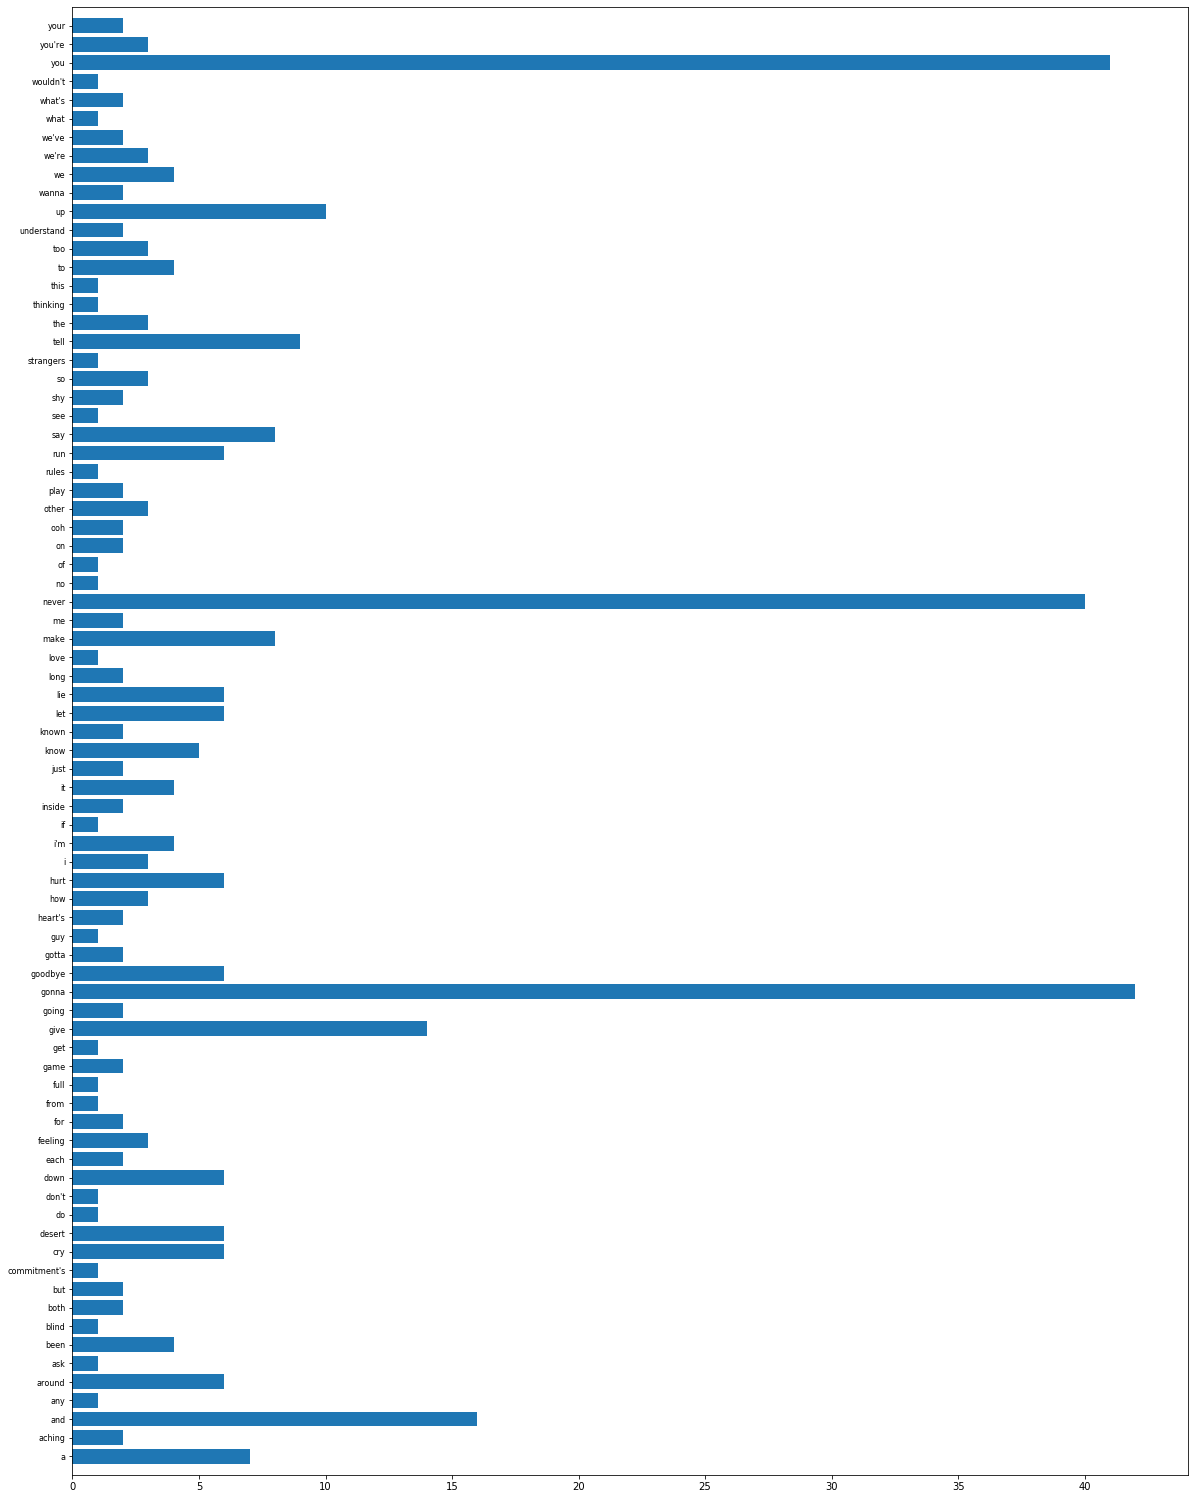

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots(figsize=(20,27))
plt.yticks(range(len(freq_dict)), list(freq_dict.keys()), fontsize=8)
plt.ylim(-1, len(freq_dict))
plt.barh(range(len(freq_dict)), list(freq_dict.values()), align='center')

## Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

### Narda - Kamikaze

In [38]:
# Storing the data in one string
narda_data = """
Tila ibon kung lumipad
Sumabay sa hangin
Akoy napatingin
Sa dalagang nababalot ng hiwaga

Mapapansin kaya
Sa dami ng 'yong ginagawa
Kung kaagaw ko ang lahat
May pag asa bang makilala ka

Awit na nananawagan
Baka sakaling napakikinggan
Pag ibig na palaisipan
Sa kanta na lang idaraan

Nag-aabang sa langit
Sa mga ulap sumisilip
Sa likod ng mga tala
Kahit sulyap lang darna

Ang swerte nga naman ni Ding
Lagi ka nyang kapiling
Kung ako sa kanya
Niligawan na kita

Mapapansin kaya
Sa dami ng 'yong ginagawa
Kung kaagaw ko ang lahat
May pag asa bang makilala ka

Awit na nananawagan
Baka sakaling napakikinggan
Pag ibig na palaisipan
Sa kanta na lang idaraan

Nag-aabang sa langit
Sa mga ulap sumisilip
Sa likod ng mga tala
Kahit sulyap lang darna

Tumalon kaya ako sa bangin
Para lang iyong sagipin
Ito ang tanging paraan
Para mayakap ka

Darating kaya
Sa dami ng 'yong ginagawa
Kung kaagaw ko sila
Paano na kaya

Awit na nananawagan
Baka sakaling napakikinggan
Pag ibig na palaisipan
Sa kanta na lang idaraan

Nag-aabang sa langit
Sa mga ulap sumisilip
Sa likod ng mga tala
Kahit sulyap lang darna

Nag-aabang sa langit
Sa mga ulap sumisilip
Sa likod ng mga tala
Kahit sulyap lang darna
"""

In [39]:
narda_lines = list(filter(lambda x: ('[' not in x and x.strip() != ''), narda_data.split('\n')))
narda_words = [re.sub(r"[^\w\d'\s]+", '', word).lower() for count, line in enumerate(narda_lines, start=1) for word in line.split()]

from itertools import groupby

narda_freq_dict = {key:len(list(group)) for key, group in groupby(sorted(narda_words))}    
print(narda_freq_dict)
print("Length: " + str(len(narda_freq_dict)))

# Source: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list

{"'yong": 3, 'ako': 2, 'akoy': 1, 'ang': 4, 'asa': 2, 'awit': 3, 'baka': 3, 'bang': 2, 'bangin': 1, 'dalagang': 1, 'dami': 3, 'darating': 1, 'darna': 4, 'ding': 1, 'ginagawa': 3, 'hangin': 1, 'hiwaga': 1, 'ibig': 3, 'ibon': 1, 'idaraan': 3, 'ito': 1, 'iyong': 1, 'ka': 4, 'kaagaw': 3, 'kahit': 4, 'kanta': 3, 'kanya': 1, 'kapiling': 1, 'kaya': 5, 'kita': 1, 'ko': 3, 'kung': 5, 'lagi': 1, 'lahat': 2, 'lang': 8, 'langit': 4, 'likod': 4, 'lumipad': 1, 'makilala': 2, 'mapapansin': 2, 'may': 2, 'mayakap': 1, 'mga': 8, 'na': 11, 'nababalot': 1, 'nagaabang': 4, 'naman': 1, 'nananawagan': 3, 'napakikinggan': 3, 'napatingin': 1, 'ng': 8, 'nga': 1, 'ni': 1, 'niligawan': 1, 'nyang': 1, 'paano': 1, 'pag': 5, 'palaisipan': 3, 'para': 2, 'paraan': 1, 'sa': 22, 'sagipin': 1, 'sakaling': 3, 'sila': 1, 'sulyap': 4, 'sumabay': 1, 'sumisilip': 4, 'swerte': 1, 'tala': 4, 'tanging': 1, 'tila': 1, 'tumalon': 1, 'ulap': 4}
Length: 73


<BarContainer object of 73 artists>

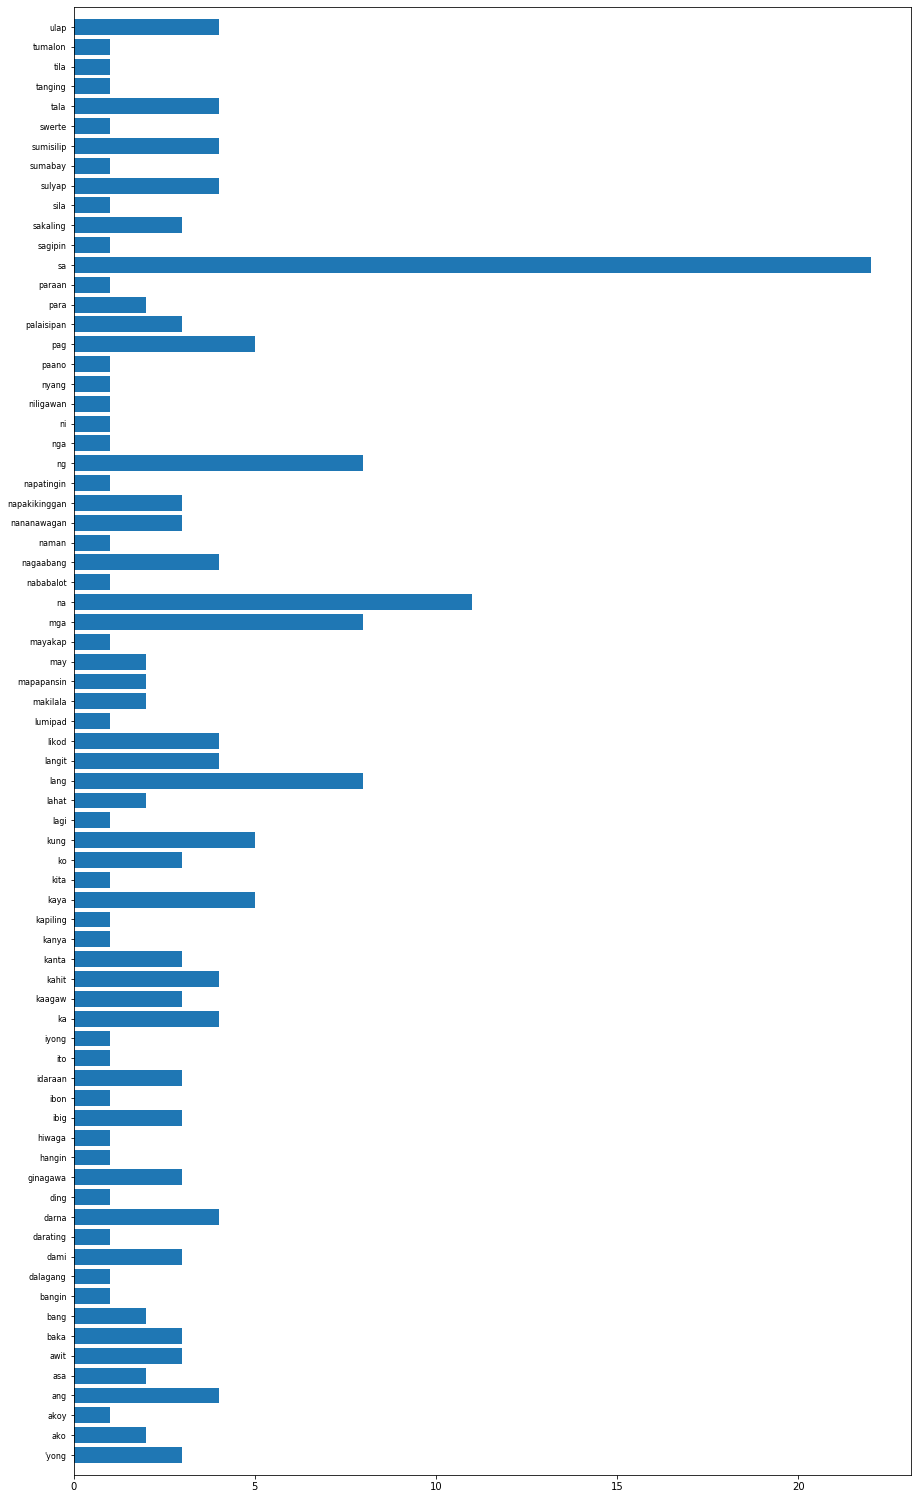

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots(figsize=(15,27))
plt.yticks(range(len(narda_freq_dict)), list(narda_freq_dict.keys()), fontsize=8)
plt.ylim(-1, len(narda_freq_dict))
plt.barh(range(len(narda_freq_dict)), list(narda_freq_dict.values()), align='center')

### Love Story - Taylor Swift

In [42]:
# Storing the data in one string
love_data = """
We were both young when I first saw you
I close my eyes and the flashback starts
I'm standing there
On a balcony in summer air

See the lights see the party the ball gowns
See you make your way through the crowd
And say Hello
Little did I know

That you were Romeo you were throwing pebbles
And my daddy said Stay away from Juliet
And I was crying on the staircase
Begging you Please don't go
And I said

Romeo take me somewhere we can be alone
I'll be waiting All that's left to do is run
You'll be the prince and I'll be the princess
It's a love story Baby just say 'Yes'

So I sneak out to the garden to see you
We keep quiet 'cause we're dead if they knew
So close your eyes
Escape this town for a little while
Oh oh

'Cause you were Romeo I was a scarlet letter
And my daddy said Stay away from Juliet
But you were everything to me
I was begging you Please don't go!
And I said

Romeo take me somewhere we can be alone
I'll be waiting All that's left to do is run
You'll be the prince and I'll be the princess
It's a love story Baby just say Yes

Romeo save me They're trying to tell me how to feel
This love is difficult but it's real
Don't be afraid We'll make it out of this mess
It's a love story Baby just say Yes

Oh oh oh

I got tired of waiting
Wondering if you were ever coming around
My faith in you was fading
When I met you on the outskirts of town
And I said

Romeo save me I've been feeling so alone
I keep waiting for you but you never come
Is this in my head I don't know what to think
He knelt to the ground and pulled out a ring and said

Marry me Juliet You'll never have to be alone
I love you and that's all I really know
I talked to your dad Go pick out a white dress
It's a love story Baby just say Yes

Oh oh oh oh oh oh

'Cause we were both young when I first saw you
"""

In [43]:
love_lines = list(filter(lambda x: ('[' not in x and x.strip() != ''), love_data.split('\n')))
love_words = [re.sub(r"[^\w\d'\s]+", '', word).lower() for count, line in enumerate(love_lines, start=1) for word in line.split()]

from itertools import groupby

love_freq_dict = {key:len(list(group)) for key, group in groupby(sorted(love_words))}    
print(love_freq_dict)
print("Length: " + str(len(love_freq_dict)))

# Source: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list

{"'cause": 3, "'yes'": 1, 'a': 9, 'afraid': 1, 'air': 1, 'all': 3, 'alone': 4, 'and': 13, 'around': 1, 'away': 2, 'baby': 4, 'balcony': 1, 'ball': 1, 'be': 10, 'been': 1, 'begging': 2, 'both': 2, 'but': 3, 'can': 2, 'close': 2, 'come': 1, 'coming': 1, 'crowd': 1, 'crying': 1, 'dad': 1, 'daddy': 2, 'dead': 1, 'did': 1, 'difficult': 1, 'do': 2, "don't": 4, 'dress': 1, 'escape': 1, 'ever': 1, 'everything': 1, 'eyes': 2, 'fading': 1, 'faith': 1, 'feel': 1, 'feeling': 1, 'first': 2, 'flashback': 1, 'for': 2, 'from': 2, 'garden': 1, 'go': 3, 'got': 1, 'gowns': 1, 'ground': 1, 'have': 1, 'he': 1, 'head': 1, 'hello': 1, 'how': 1, 'i': 18, "i'll": 4, "i'm": 1, "i've": 1, 'if': 2, 'in': 3, 'is': 4, 'it': 1, "it's": 5, 'juliet': 3, 'just': 4, 'keep': 2, 'knelt': 1, 'knew': 1, 'know': 3, 'left': 2, 'letter': 1, 'lights': 1, 'little': 2, 'love': 6, 'make': 2, 'marry': 1, 'me': 7, 'mess': 1, 'met': 1, 'my': 5, 'never': 2, 'of': 3, 'oh': 11, 'on': 3, 'out': 4, 'outskirts': 1, 'party': 1, 'pebbles': 1

<BarContainer object of 148 artists>

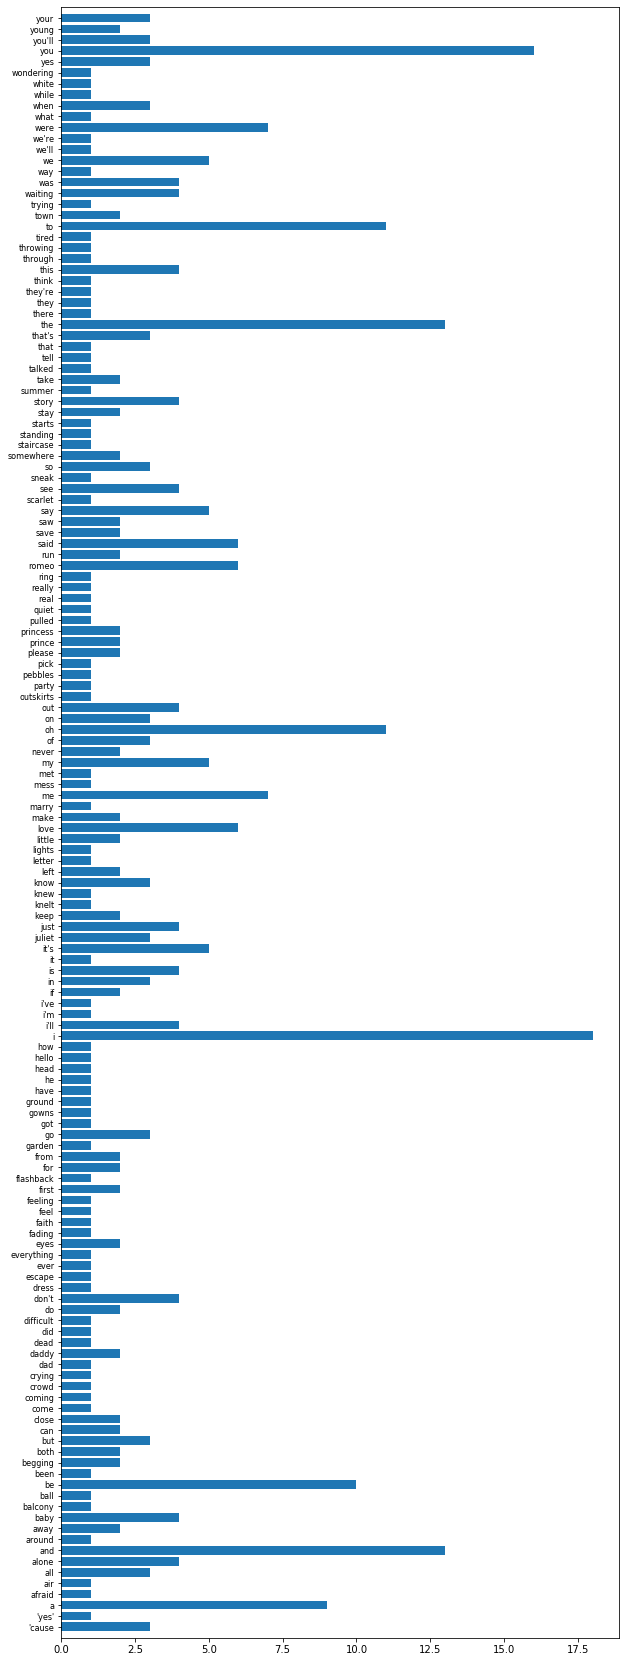

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots(figsize=(10,30))
plt.yticks(range(len(love_freq_dict)), list(love_freq_dict.keys()), fontsize=8)
plt.ylim(-1, len(love_freq_dict))
plt.barh(range(len(love_freq_dict)), list(love_freq_dict.values()), align='center')

### Findings

I noticed that the Filipino song (Narda by Kamikaze) used fewer words, 72 words specifically, by a big margin than the English song (Love Story by Taylor Swift), using 148 words. Of course, this may be because Love Story is just generally longer than Narda, but one interesting insight that I found was that there were more "common" words (or stopwords, such as "I", "Oh", "the") there than in Narda ("sa", "kung", "kaya"). The stopwords were generally more frequent in Love Story than the frequency of the Filipino stopwords in Narda. However, the most frequent word appeared in Narda, which appeared 22 times, compared to "I" which appeared 18 times.

One thing that wasn't taken into account was the contractions, so the "I" technically appeared more times, but wasn't counted correctly since we didn't include "I'll", "I'm" and "I've". Hence, if we expanded the English contractions, there would be even MORE English words, since there aren't contractions present in the Filipino song.